# PyTorch Layer 이해하기

# 예제 불러오기

In [2]:
import torch
from torchvision import datasets, transforms

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=1)

In [5]:
image, label = next(iter(train_loader))

In [6]:
image.shape, label.shape
# 배치사이즈, 채널, 그림pixel

(torch.Size([1, 1, 28, 28]), torch.Size([1]))

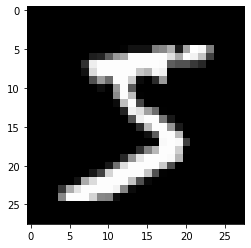

In [7]:
plt.imshow(image[0, 0, :, :], 'gray')
plt.show()

# 각 Layer별 설명

- Network 쌓기 위한 준비

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### Convolution

- in_channels: 받게 될 channel의 갯수
- out_channels: 보내고 싶은 channel의 갯수  
- kernel_size: 만들고 싶은 kernel(weights)의 사이즈

In [9]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

## pytorch는 앞채널을 지정해줘야함 (in_channels) 

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [10]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cuda')) 
layer
# device  -> cuda
# 위 라인을 Conv2d(1,20,5,1)로 간단하게 적을 수 있음

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- weight 시각화를 위해 slice하고 numpy화

In [11]:
weight = layer.weight
weight.shape
#layer의 weight 모양 확인

torch.Size([20, 1, 5, 5])

- 여기서 weight는 학습 가능한 상태이기 때문에 바로 numpy로 뽑아낼 수 없음
- detach() method는 그래프에서 잠깐 빼서 gradient에 영향을 받지 않게 함

In [12]:
weight = weight.detach().cpu().numpy()

# 쿠다 텐서는 바로 넘파이로 못넘김
# 먼저 cpu 텐서로바꿔줘야하므로, cpu. 추가

weight

array([[[[-0.13321722,  0.17733653, -0.06919475,  0.13643868,
           0.1200632 ],
         [-0.07533641,  0.05875166,  0.13351764,  0.1967137 ,
          -0.17943625],
         [ 0.02989611, -0.12393218,  0.16605501,  0.05236281,
           0.18513064],
         [ 0.16853358, -0.07805612, -0.18235758, -0.13985607,
          -0.11924267],
         [ 0.18700348,  0.04884036,  0.16461043,  0.15504535,
           0.12726884]]],


       [[[ 0.01931241,  0.14208423,  0.13245182, -0.18371816,
           0.10236873],
         [-0.12852044, -0.05594666, -0.18890956,  0.15480705,
          -0.08597002],
         [ 0.09269799,  0.11234118, -0.07575138,  0.09768797,
          -0.05438653],
         [ 0.06163214, -0.0198396 ,  0.12632059, -0.18749988,
          -0.07962771],
         [ 0.07181896, -0.05235167, -0.15450394,  0.15591411,
           0.07566907]]],


       [[[ 0.01726215, -0.06432645,  0.00791307, -0.03962271,
          -0.08274031],
         [-0.12788492,  0.07686295, -0.0410144

In [13]:
weight.shape
# weight의 모양 -> [해당 layer의 out, input size(채널), kernerl size]

(20, 1, 5, 5)

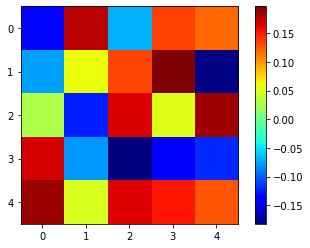

In [14]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

- output 시각화 준비를 위해 numpy화

In [15]:

image = image.to(device)
label= label.to(device)
output_data = layer(image)

# 여기서 이미지,라벨을 DEVICe로 보내주지 않으면 CUDA관련 런타임에러가 뜸

In [16]:
output_data = output_data.data

In [17]:
output_data

tensor([[[[-4.7363e-02, -4.7363e-02, -4.7363e-02,  ..., -4.7363e-02,
           -4.7363e-02, -4.7363e-02],
          [-4.7363e-02, -4.7363e-02, -4.7363e-02,  ...,  2.6893e-01,
            1.5810e-01,  4.5772e-02],
          [-4.7363e-02, -4.7363e-02, -4.7363e-02,  ...,  2.1087e-01,
            2.3227e-01,  8.3507e-02],
          ...,
          [-7.1029e-02, -1.0409e-01, -1.7914e-01,  ..., -4.7363e-02,
           -4.7363e-02, -4.7363e-02],
          [ 1.2671e-02,  8.5639e-02,  2.8776e-01,  ..., -4.7363e-02,
           -4.7363e-02, -4.7363e-02],
          [-1.1717e-01, -1.0066e-02,  2.2450e-01,  ..., -4.7363e-02,
           -4.7363e-02, -4.7363e-02]],

         [[-1.4044e-01, -1.4044e-01, -1.4044e-01,  ..., -1.4044e-01,
           -1.4044e-01, -1.4044e-01],
          [-1.4044e-01, -1.4044e-01, -1.4044e-01,  ..., -1.9628e-01,
           -9.6946e-02, -1.0467e-01],
          [-1.4044e-01, -1.4044e-01, -1.4044e-01,  ..., -4.5765e-02,
           -4.8840e-02, -9.1719e-02],
          ...,
     

In [18]:
output = output_data.cpu().numpy()

In [19]:
output

array([[[[-4.7363311e-02, -4.7363311e-02, -4.7363311e-02, ...,
          -4.7363311e-02, -4.7363311e-02, -4.7363311e-02],
         [-4.7363311e-02, -4.7363311e-02, -4.7363311e-02, ...,
           2.6893073e-01,  1.5809780e-01,  4.5771755e-02],
         [-4.7363311e-02, -4.7363311e-02, -4.7363311e-02, ...,
           2.1087423e-01,  2.3226854e-01,  8.3507225e-02],
         ...,
         [-7.1029261e-02, -1.0409427e-01, -1.7914177e-01, ...,
          -4.7363311e-02, -4.7363311e-02, -4.7363311e-02],
         [ 1.2671098e-02,  8.5639089e-02,  2.8775865e-01, ...,
          -4.7363311e-02, -4.7363311e-02, -4.7363311e-02],
         [-1.1716667e-01, -1.0066491e-02,  2.2450188e-01, ...,
          -4.7363311e-02, -4.7363311e-02, -4.7363311e-02]],

        [[-1.4043891e-01, -1.4043891e-01, -1.4043891e-01, ...,
          -1.4043891e-01, -1.4043891e-01, -1.4043891e-01],
         [-1.4043891e-01, -1.4043891e-01, -1.4043891e-01, ...,
          -1.9627824e-01, -9.6946284e-02, -1.0467026e-01],
        

In [20]:
output.shape

(1, 20, 24, 24)

- Input으로 들어간 이미지 numpy화 

In [21]:
image_arr = image.cpu().numpy()
image_arr.shape
#현 이미지는 cuda 에 담겨있음

(1, 1, 28, 28)

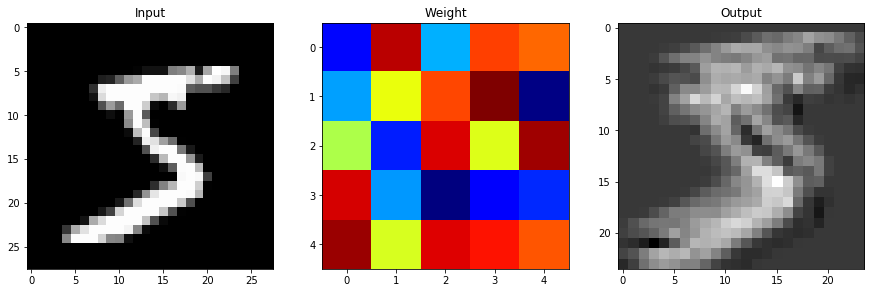

In [22]:
plt.figure(figsize=(15, 30))
plt.subplot(131)
plt.title('Input')
plt.imshow(np.squeeze(image_arr), 'gray')
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0, 0, :, :], 'jet')
plt.subplot(133)
plt.title('Output')
plt.imshow(output[0, 0, :, :], 'gray')
plt.show()
#원본이미지, weight,레이어를 통과한 이미지모양 각각 시각화

### Pooling

input을 먼저 앞에 넣고, 뒤에 kernel 사이즈와 stride를 순서대로 넣음

In [23]:
image.shape

torch.Size([1, 1, 28, 28])

In [24]:
pool = F.max_pool2d(image, 2, 2)
pool.shape

torch.Size([1, 1, 14, 14])

- MaxPool Layer는 weight가 없기 때문에 바로 numpy()가 가능

In [25]:
pool_arr = pool.cpu().numpy()
pool_arr.shape
#pool이 쿠다 이미지를 받았으므로, cpu쓰고 넘파이화하는거 잊지말것

(1, 1, 14, 14)

In [26]:
image_arr.shape

(1, 1, 28, 28)

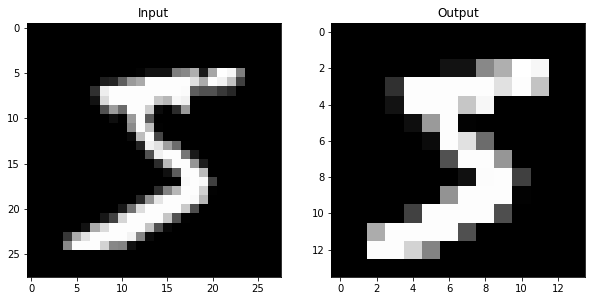

In [27]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.title("Input")
plt.imshow(np.squeeze(image_arr), 'gray')
plt.subplot(122)
plt.title('Output')
plt.imshow(np.squeeze(pool_arr), 'gray')
plt.show()

### Linear

nn.Linear는 2d가 아닌 1d만 들어가기 때문에 .view() 1D로 펼쳐줘야함

In [28]:
image.shape

torch.Size([1, 1, 28, 28])

In [29]:
flatten = image.view(1, 28 * 28) # 맨앞이 배치사이즈. 배치사이즈는 유지해야함
flatten.shape

torch.Size([1, 784])

In [30]:
lin = nn.Linear(784, 10)(flatten.cpu()) #784개 받고 10개로 내보냄
lin.shape
#한편 flatten도 cuda이므로, cpu로 변환

torch.Size([1, 10])

In [31]:
lin

tensor([[ 0.1667, -0.0138, -0.1641,  0.1744,  0.0140, -0.1442, -0.1359, -0.1844,
         -0.0595, -0.0764]], grad_fn=<AddmmBackward>)

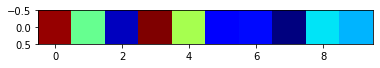

In [32]:
plt.imshow(lin.detach().numpy(), 'jet')
# linear에는 weight 속성이 붙어있어서 detach로 해줘야한다고함.
# weight 속성을 갖는 변수를 사용할때마다, cuda속성에 cpu를 달아줘야하는듯.
plt.show()

### Softmax

결과를 numpy로 꺼내기 위해선 weight가 담긴 Linear에 weight를 꺼줘야함

In [33]:
with torch.no_grad():
    flatten = image.view(1, 28 * 28)
    lin = nn.Linear(784, 10)(flatten.cpu())
    softmax = F.softmax(lin, dim=1)
    
    #no grad를 해야지만 softmax 결과 볼수 있음

In [34]:
softmax

tensor([[0.1227, 0.0733, 0.0937, 0.1228, 0.1006, 0.1020, 0.0772, 0.0890, 0.1031,
         0.1155]])

In [35]:
np.sum(softmax.numpy())

0.99999994

# Layer 쌓기

예제 출처: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#id23

nn 과 nn.functional의 차이점
- nn은 학습 파라미터가 담긴 것 
- nn.functional은 학습 파라미터가 없는 것이라 생각하면 간단

In [36]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1) # 인채널1, 아웃20, 커널5, stride 1
        self.conv2 = nn.Conv2d(20, 50, 5, 1)#인채널 20, 아웃50
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)
        
    def forward(self, x):
        # Feature Extraction
        x = F.relu(self.conv1(x)) # conv1의 결과가 relu를 거치고
        x = F.max_pool2d(x, 2, 2) #풀링을 거쳐 image size 반토막
        x = F.relu(self.conv2(x)) # 그 결과를 다시 conv2로 넣고
        x = F.max_pool2d(x, 2, 2) #또다시 image size 반토막
        #결과적으로 28x28 -> 7x7
        
        
        # 위에서, conv1,2를 통과한 forward 사이즈를 반환해보면 4x4가 나옴.
        
        # Fully Connected (Classficiation)
        x = x.view(-1, 4*4*50)  # forward에서 나온 output 4*4이므로, 4by4 x 50으로 설정
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

- Image를 Model에 넣어서 결과 확인

In [42]:
model = Net()
model = model.to(device)
# 여기서 모델을 device로 옮겨줘야함

In [43]:
result = model.forward(image)
# 위에서 모델을 device(cuda)로 옮겨주지 않으면, weight를 담당하는 모델이 cuda로 넘어가지 않으므로,
# 쿠다에 저장된 이미지와 연동이 안되어 오류가 생김.

In [44]:
result

tensor([[-2.3006, -2.2557, -2.3142, -2.2683, -2.3713, -2.3465, -2.2985, -2.3070,
         -2.2846, -2.2845]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

In [45]:
# 명령어 어떤거있는지 보는법
# ex, model. 다음 무엇이있는지 알고싶다면,,
# model. 하고 tap을 누르면 가능한 함수명이 뜸